In [164]:
from datetime import date
from datetime import datetime
import pandas as pd
import numpy as np

import yahoo_fin.stock_info as si
from yahoo_fin import options

In [165]:
Mat = date(2024, 8, 30)  # Fill in the maturity you want to consider here!
T = Mat - date.today()
ticker = "IBM"

chain = options.get_options_chain(ticker, Mat)
# options_mats = options.get_expiration_dates(ticker)
options_mats = ['August 16, 2024', 'August 23, 2024', 'August 30, 2024', 'September 6, 2024', 'September 13, 2024', 'September 20, 2024', 'September 27, 2024']

price = si.get_live_price(ticker)
print(price)

callData = chain["calls"]
putData = chain["puts"]

callData.head(15)

c:\Users\adevr\AppData\Local\Programs\Python\Python312\Lib\site-packages\yahoo_fin\options.py:42: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(requests.get(site, headers=headers).text)


197.97999572753906


c:\Users\adevr\AppData\Local\Programs\Python\Python312\Lib\site-packages\yahoo_fin\stock_info.py:580: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.close[-1]


,Contract Name,Last Trade Date (EDT),Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,IBM240830C00165000,8/23/2024 7:52 PM,165.0,31.05,0.0,0.0,0.0,0.00%,23,23,0.00%
1,IBM240830C00170000,8/16/2024 6:16 PM,170.0,24.07,0.0,0.0,0.0,0.00%,4,7,0.00%
2,IBM240830C00175000,8/7/2024 1:57 PM,175.0,13.93,0.0,0.0,0.0,0.00%,1,0,0.00%
3,IBM240830C00180000,8/23/2024 6:34 PM,180.0,16.35,0.0,0.0,0.0,0.00%,10,9,0.00%
4,IBM240830C00185000,8/26/2024 7:38 PM,185.0,13.40,0.0,0.0,0.0,0.00%,1,79,0.00%
5,IBM240830C00187500,8/26/2024 2:35 PM,187.5,10.80,0.0,0.0,0.0,0.00%,1,13,0.00%
6,IBM240830C00190000,8/26/2024 5:25 PM,190.0,8.30,0.0,0.0,0.0,0.00%,4,174,0.00%
7,IBM240830C00192500,8/26/2024 7:35 PM,192.5,6.18,0.0,0.0,0.0,0.00%,24,151,0.00%
8,IBM240830C00195000,8/26/2024 7:58 PM,195.0,3.78,0.0,0.0,0.0,0.00%,244,1247,0.00%
9,IBM240830C00197500,8/26/2024 7:59 PM,197.5,2.09,0.0,0.0,0.0,0.00%,695,1024,0.00%


C:\Users\adevr\AppData\Local\Temp\ipykernel_3240\2289191945.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_call["Strike"] = df_call["Strike"].astype(float)


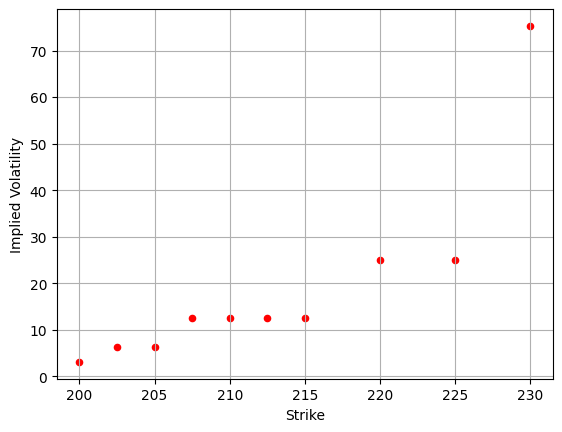

In [166]:
import matplotlib.pyplot as plt

df_call = callData
df_call["Implied Volatility"] = df_call["Implied Volatility"].str[:-1]
df_call["Implied Volatility"] = df_call["Implied Volatility"].astype(float)
df_call = df_call[df_call["Implied Volatility"] > 0]
df_call["Strike"] = df_call["Strike"].astype(float)
df_call = df_call[
    df_call["Strike"] > price * 0.8
]  # We will only consider those options within a certain range of the current price
df_call = df_call[
    df_call["Strike"] < price * 1.2
]  # One reason for this is that it is precisely those options that are most often traded.


df_call.plot(kind="scatter", x="Strike", y="Implied Volatility", color="red")
plt.grid()
plt.show()

In [167]:
import numpy as np
from scipy.stats import norm

N_prime = norm.pdf
N = norm.cdf

vega: $\nu = \frac{\partial C}{\partial \sigma} = S \times \sqrt{T} \times \varphi(d_1) \qquad$, where $\varphi()$ is the PDF of standard gaussian.

In [168]:
def black_scholes_call(S, K, T, r, sigma):
    """
    :param S: Asset price
    :param K: Strike price
    :param T: Time to maturity
    :param r: risk-free rate (treasury bills)
    :param sigma: volatility
    :return: call price
    """

    # Black-Scholes Formula
    d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    call = S * N(d1) - N(d2) * K * np.exp(-r * T)
    return call

# Black-Scholes formula for European put option
def black_scholes_put(S0, K, T, r, sigma):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    P = K * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
    return P

def vega(S, K, T, r, sigma):
    """

    :param S: Asset price
    :param K: Strike price
    :param T: Time to Maturity
    :param r: risk-free rate (treasury bills)
    :param sigma: volatility
    :return: partial derivative w.r.t volatility
    """

    # Calculating d1 from black scholes
    d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / sigma * np.sqrt(T)
    vega = S * np.sqrt(T) * N_prime(d1)
    return vega

def implied_vol_NR(call_or_put, S, K, T, r, sigma, C_market, epsilon=0.001, max_iterations=100):
    if call_or_put == "C":
        BSfunc = black_scholes_call
    else:
        BSfunc = black_scholes_put
    iteration = 0
    func = BSfunc(S, K, T, r, sigma) - C_market
    while abs(func) > epsilon:
        iteration += 1
        if iteration >= max_iterations:
            print("Max iterations reached! Terminating program.")
            return None
        func = BSfunc(S, K, T, r, sigma) - C_market
        deriv = vega(S, K, T, r, sigma)
        sigma = sigma - func/deriv
        if iteration % 1 == 0:
            print(f"Iteration {iteration} sigma =", np.round(sigma, 3))
            print("func =", func)
            print("vega =", deriv)
    return sigma

observed_price = 18
S = 100
K = 115
T = 1
r = 0.05
sigma0 = 0.3  # initial value for sigma

imp_vol = implied_vol_NR("C", S, K, T, r, sigma0, observed_price)
print("Implied volatility using Newton Rapshon is: ", np.round(imp_vol, 3))

Iteration 1 sigma = 0.545
func = -9.662214674608215
vega = 39.45261638955987
Iteration 2 sigma = 0.543
func = 0.08188155419721
vega = 39.66342094753358
Iteration 3 sigma = 0.543
func = -7.274655111189077e-06
vega = 39.67045401307059
Implied volatility using Newton Rapshon is:  0.543


In [169]:
observed_price = 22
S = 100
K = 115
T = 1
r = 0.05
sigma0 = 0.3  # initial value for sigma

imp_vol = implied_vol_NR("C", S, K, T, r, sigma0, observed_price)
print("Implied volatility using Newton Rapshon is: ", np.round(imp_vol, 3))

Iteration 1 sigma = 0.646
func = -13.662214674608215
vega = 39.45261638955987
Iteration 2 sigma = 0.644
func = 0.08239579075536341
vega = 39.22270448424384
Iteration 3 sigma = 0.644
func = -1.1377804788992307e-05
vega = 39.23352605288243
Implied volatility using Newton Rapshon is:  0.644


In [170]:
observed_price = 12
S = 100
K = 115
T = 0.5
r = 0.3
sigma0 = 0.4  # initial value for sigma
epsilon = 0.1

imp_vol = implied_vol_NR(S, K, T, r, sigma0, observed_price, epsilon)
print("Implied volatility using Newton Rapshon is: ", np.round(imp_vol, 3))

Iteration 1 sigma = 11.971
func = 0.33814183398043507
vega = 11.654754421269779
Iteration 2 sigma = 11.942
func = 0.3379970665592197
vega = 11.6803186621082
Iteration 3 sigma = 11.913
func = 0.3378491298735631
vega = 11.705792346049419
Iteration 4 sigma = 11.884
func = 0.3376979750791246
vega = 11.73117538388252
Iteration 5 sigma = 11.856
func = 0.3375435530785499
vega = 11.756467683530115
Iteration 6 sigma = 11.827
func = 0.33738581453307825
vega = 11.781669150088431
Iteration 7 sigma = 11.798
func = 0.3372247098745065
vega = 11.806779685868545
Iteration 8 sigma = 11.77
func = 0.3370601893175099
vega = 11.831799190438595
Iteration 9 sigma = 11.742
func = 0.33689220287232224
vega = 11.856727560667176
Iteration 10 sigma = 11.713
func = 0.33672070035777346
vega = 11.881564690767776
Iteration 11 sigma = 11.685
func = 0.33654563141468663
vega = 11.906310472344398
Iteration 12 sigma = 11.657
func = 0.3363669455196342
vega = 11.930964794438255
Iteration 13 sigma = 11.629
func = 0.33618459199

TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

# Option Chains data

In [ ]:
# temp_data = pd.DataFrame()
# callData = pd.DataFrame()
# options_mats = ['August 16, 2024', 'August 23, 2024', 'August 30, 2024', 'September 6, 2024', 'September 13, 2024', 'September 20, 2024', 'September 27, 2024']
# for time in options_mats:
#     chain = options.get_options_chain(ticker, time)
#     chain_df = chain["calls"]
#     print("chain_df:", chain_df)
#     date_time_obj = datetime.strptime(time, "%B %d, %Y")
#     Td = date_time_obj - datetime.today()

#     for row in range(len(chain_df.index)):
#         values_to_add = {"Matdays": Td.days, "Maturity": date_time_obj}
#         values_to_add_call = {
#             "Strike": chain_df["Strike"].loc[row],
#             "Implied Vol": chain_df["Implied Volatility"].loc[row],
#             "Price": chain_df["Last Price"].loc[row],
#         }
#         row_to_add = pd.Series(values_to_add)
#         row_to_add_call = pd.Series(values_to_add_call)
#         temp_data = temp_data.append(row_to_add, ignore_index=True)
#         callData = callData.append(row_to_add_call, ignore_index=True)

# callData = pd.concat([callData, temp_data], axis=1)
# callData.head()

# Local Volatility Models

## Non-parametric Local Volatility Models

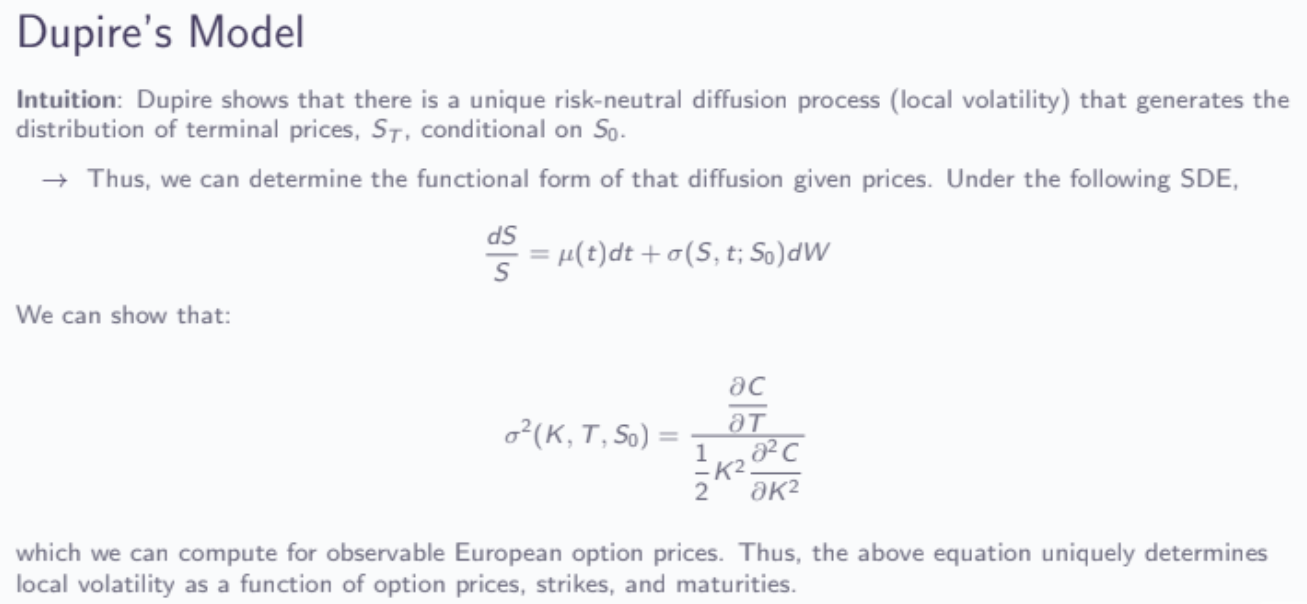

## Parametric Local Volatility Models

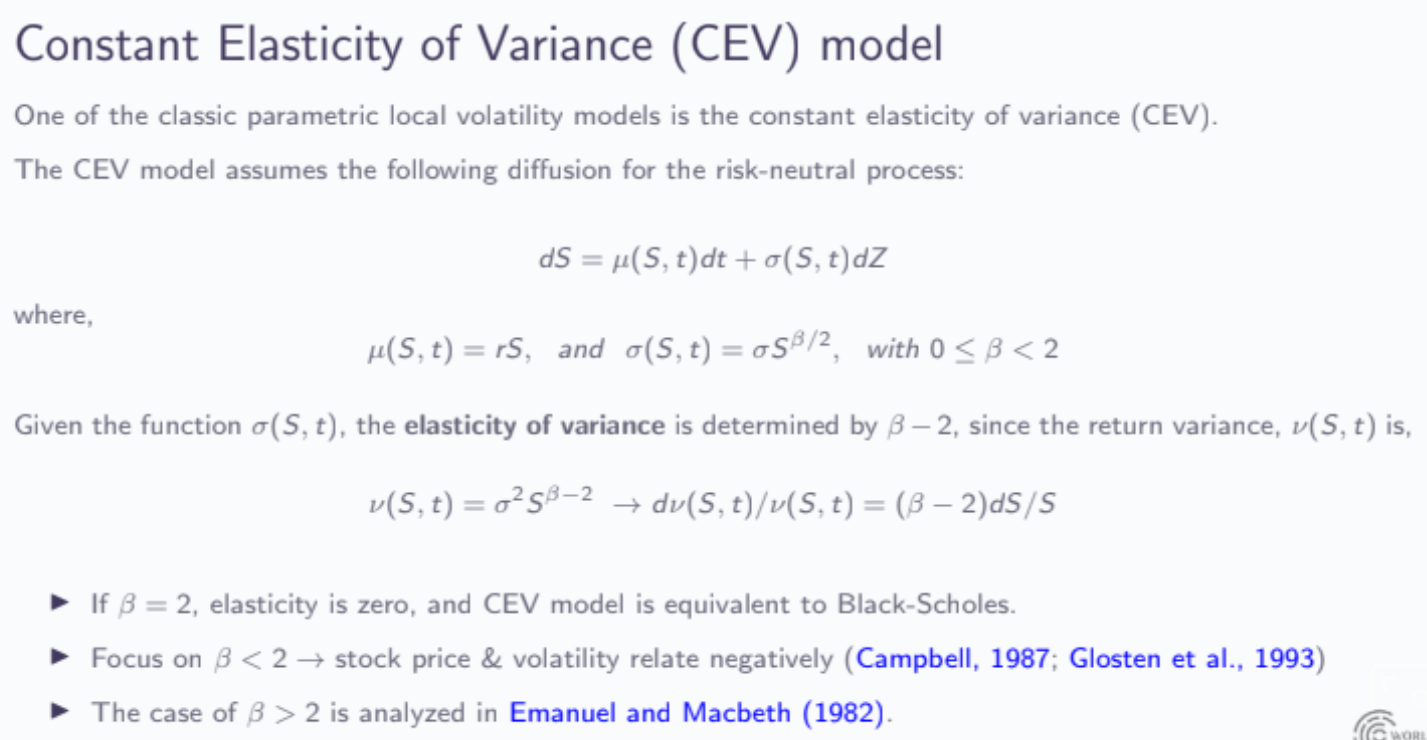

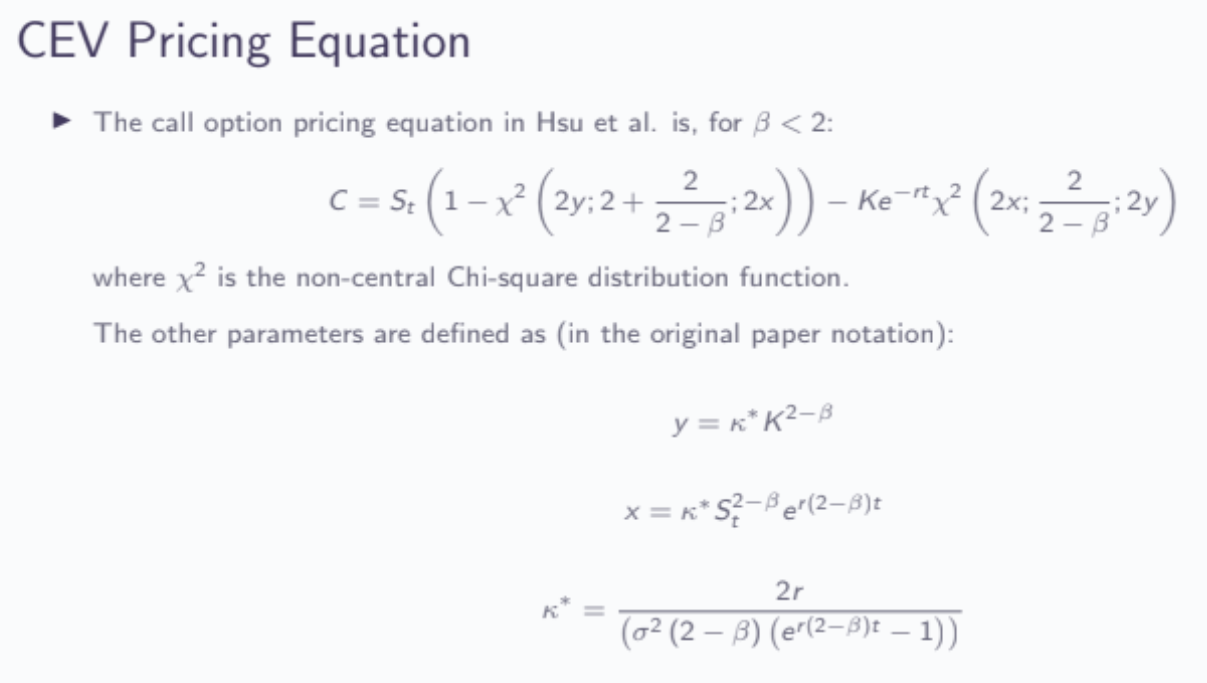

In [ ]:
Mat = date(2024, 8, 30)  # Fill in the maturity you want to consider here!
T = Mat - date.today()
ticker = "IBM"

chain = options.get_options_chain(ticker, Mat)
# options_mats = options.get_expiration_dates(ticker)
options_mats = ['August 16, 2024', 'August 23, 2024', 'August 30, 2024', 'September 6, 2024', 'September 13, 2024', 'September 20, 2024', 'September 27, 2024']

price = si.get_live_price(ticker)
print(price)

callData = chain["calls"]
putData = chain["puts"]

callData.head(15)

c:\Users\adevr\AppData\Local\Programs\Python\Python312\Lib\site-packages\yahoo_fin\options.py:42: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(requests.get(site, headers=headers).text)


197.97999572753906


c:\Users\adevr\AppData\Local\Programs\Python\Python312\Lib\site-packages\yahoo_fin\stock_info.py:580: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.close[-1]


,Contract Name,Last Trade Date (EDT),Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,IBM240830C00165000,8/23/2024 7:52 PM,165.0,31.05,0.0,0.0,0.0,0.00%,23,23,0.00%
1,IBM240830C00170000,8/16/2024 6:16 PM,170.0,24.07,0.0,0.0,0.0,0.00%,4,7,0.00%
2,IBM240830C00175000,8/7/2024 1:57 PM,175.0,13.93,0.0,0.0,0.0,0.00%,1,0,0.00%
3,IBM240830C00180000,8/23/2024 6:34 PM,180.0,16.35,0.0,0.0,0.0,0.00%,10,9,0.00%
4,IBM240830C00185000,8/26/2024 7:38 PM,185.0,13.40,0.0,0.0,0.0,0.00%,1,79,0.00%
5,IBM240830C00187500,8/26/2024 2:35 PM,187.5,10.80,0.0,0.0,0.0,0.00%,1,13,0.00%
6,IBM240830C00190000,8/26/2024 5:25 PM,190.0,8.30,0.0,0.0,0.0,0.00%,4,174,0.00%
7,IBM240830C00192500,8/26/2024 7:35 PM,192.5,6.18,0.0,0.0,0.0,0.00%,24,151,0.00%
8,IBM240830C00195000,8/26/2024 7:58 PM,195.0,3.78,0.0,0.0,0.0,0.00%,244,1247,0.00%
9,IBM240830C00197500,8/26/2024 7:59 PM,197.5,2.09,0.0,0.0,0.0,0.00%,695,1024,0.00%


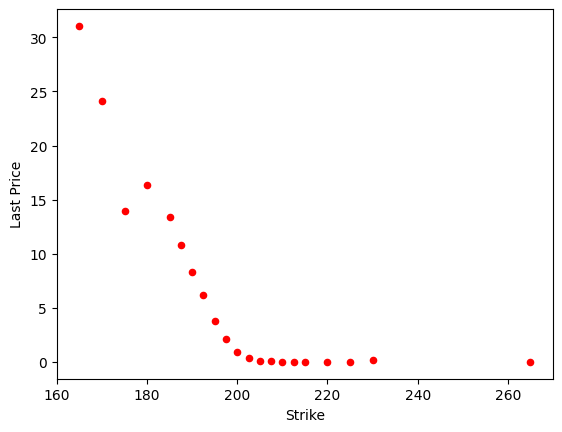

In [ ]:
import matplotlib.pyplot as plt

df_call = callData

df_call["Implied Volatility"] = df_call["Implied Volatility"].str[:-1]
df_call["Implied Volatility"] = df_call["Implied Volatility"].astype(float)

df_call.plot(kind="scatter", x="Strike", y="Last Price", color="red")
plt.show()

Obviously, as the option is more ITM, the premium of the call option increases. The question at this point is, can we replicate these prices with the CEV model?


## **2. Implementing CEV Model with Known Parameters**

Next, let's code our CEV model. As we have seen in the slides from the previous lesson, there are several equivalent specifications for the CEV model. We are going to follow the one in Hsu et al.,2008. (You can check the paper in the [additional readings for the lesson.](https://www.sciencedirect.com/science/article/pii/S0378475407002601?casa_token=x6aiAwSGHU0AAAAA:SWPmucDQ5mjSdSj5lzLRFgoPHGjq0L54Fs84zAmk9WfVjMGREQTJrDj-HGUX6e6iD5nSJcA5*) **Note**: This is not a required reading.)


Hsu et al.'s paper derives the following functional form for the call option price based on the following diffusion for the underlying asset:

$dS = \mu(S,t) dt + \sigma(S, t)dZ$, with:

$\sigma(S, t) = \sigma S^{\beta/2}$, $0\leq \beta < 2$

$\mu(S, t) = rS$

\
Of course, an important assumption is going to be the choice of our parameters $σ$ and and $\beta$. We will refine these choices later, but so far, let's just assume some given parameters. Later on, we will calibrate these parameters to market prices. For now:

- $\sigma = 0.35$
- $\beta = 1.25$

Also, let's assume a value for the risk-free rate:

- $r=0.05$


Mean Squared Error is  5.243611781942118


c:\Users\adevr\AppData\Local\Programs\Python\Python312\Lib\site-packages\yahoo_fin\stock_info.py:580: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df.close[-1]


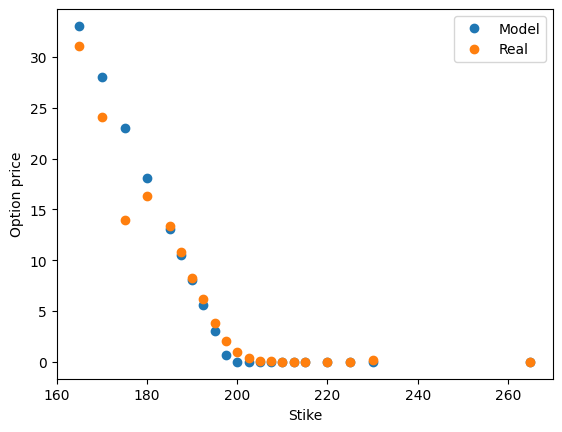

In [ ]:
import numpy as np
from scipy.stats import ncx2
from sklearn.metrics import mean_squared_error

# Variables
S0 = si.get_live_price(ticker)
r = 0.05
Td = T.days / 365

sigma = 0.35
beta = 1.25


def C(t, K, sigma, beta):
    zb = 2 + 2 / (2 - beta)
    kappa = 2 * r / (sigma**2 * (2 - beta) * (np.exp(r * (2 - beta) * t) - 1))
    x = kappa * S0 ** (2 - beta) * np.exp(r * (2 - beta) * t)
    y = kappa * K ** (2 - beta)
    return S0 * (1 - ncx2.cdf(2 * y, zb, 2 * x)) - K * np.exp(-r * t) * (
        ncx2.cdf(2 * x, zb - 2, 2 * y)
    )


test_strikes = df_call["Strike"]
modelprices = C(Td, test_strikes, sigma, beta)
realprices = df_call["Last Price"]
plt.plot(test_strikes, modelprices, "o", label="Model")
plt.plot(test_strikes, realprices, "o", label="Real")
plt.xlabel("Stike")
plt.ylabel("Option price")
plt.legend()
err = mean_squared_error(modelprices.values, realprices)
print("Mean Squared Error is ", err)

As you can see from the previous graphs, it seems that our model is not doing a very good job in replicating the observed option prices. (You even observe some very negative option prices.) Is it because of the functional form of the model, or is it just that we did not choose our parameters wisely enough?

## **3. CEV Model Calibration**

Finally, what we are going to do is calibrate this model to the option prices observed in the market. In other words, we are going to minimize the error between our CEV model prices and those prices observed in the market. We are going to optimize by changing only the parameters sigma ($\sigma$) and beta ($\beta$) in our CEV model. Hence, our minimization process will output the parameters sigma and beta that make the error with current market prices lower. This whole process is known as **calibration** of the model. 

- Why do we only focus on these parameters? Remember, **risk-neutral valuation**.

We will import the minimize module from scipy in order to proceed with the optimization. For now, we will perform a relatively simple minimization with the default procedures in scipy. In the future, you will see that some more complex calibrations may require devoting more time to the most suitable optimization method.<span style='color: transparent; font-size:1%'>All rights reserved WQU WorldQuant University QQQQ</span>

In [ ]:
from scipy.optimize import minimize
import numpy as np
from scipy.stats import ncx2

# Parameters
S0 = 64
r = 0.02
T = 6/12  # Time in years
K = np.array([60, 62, 63, 64])
C_market = np.array([4.64, 2.84, 2.07, 1.42])
bnds = ((0, None), (0, None))  # Adjust bounds for beta to avoid instability

def C(t, K, sigma, beta):
    zb = 2 + 2 / (2 - beta)
    kappa = 2 * r / (sigma**2 * (2 - beta) * (np.exp(r * (2 - beta) * t) - 1))
    x = kappa * S0 ** (2 - beta) * np.exp(r * (2 - beta) * t)
    y = kappa * K ** (2 - beta)
    return S0 * (1 - ncx2.cdf(2 * y, zb, 2 * x)) - K * np.exp(-r * t) * (
        ncx2.cdf(2 * x, zb - 2, 2 * y)
    )

def error(params):
    sigma, beta = params
    C_model = C(T, K, sigma, beta)
    mse = np.sum((C_model - C_market) ** 2)
    return mse

# Optimize
res = minimize(
    error, (0.25, 1.05), bounds=bnds, method="L-BFGS-B"
)

print("Optimization process results:")
print(res)

Optimization process results:
  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 2.642939126622632e-05
        x: [ 3.685e-01  1.123e+00]
      nit: 6
      jac: [ 4.365e-05 -1.017e-05]
     nfev: 33
     njev: 11
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>


In [171]:
# Parameters
S0 = 35
r = 0.05
T = 4/12  # Time in years
K = 32.5
params = (0.25, 1.5)
C_model = C(T, K, params[0], params[1])
C_model

3.0938124080539353

In [ ]:
# Parameters
S0 = 50
r = 0.05
T = 3/12  # Time in years
K = 45
params = (0.35, 1.25)
C_model = C(T, K, params[0], params[1])
C_model

5.560189896183651

In [172]:
def from_call_to_put(C):
    D = T * np.exp(-T*r)
    F = S0 * np.exp(T*r)
    P = C - D * (F - K)
    return P

def from_put_to_call(P):
    D = T * np.exp(-T*r)
    F = S0 * np.exp(T*r)
    C = P + D * (F - K)
    return C

C_market = 31
T = 1
S0 = 202
K = 215
r = 0.05
sigma0 = 0.3

imp_vol = implied_vol_NR("C", S0, K, T, r, sigma0, C_market, epsilon=0.0001)
imp_vol

Iteration 1 sigma = 0.4
func = -8.001270866164134
vega = 80.11108149123658
Iteration 2 sigma = 0.4
func = -0.03150900504246579
vega = 79.44366150319172
Iteration 3 sigma = 0.4
func = -6.099237310763783e-07
vega = 79.4405853633434


0.40027383290009433

In [ ]:
C_market = 22
T = 6/12
S0 = 100
K = 100
r = 0.3
sigma0 = 0.3

BS_call = black_scholes_call(S0, K, T, r, imp_vol)
BS_call - C_market

-2.327095515397559e-06

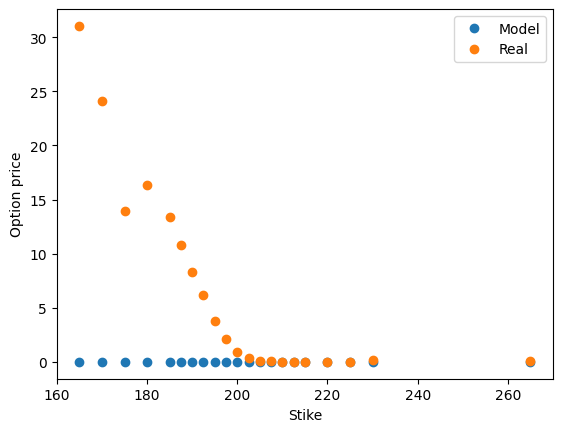

In [ ]:
modelprices = C(Td, test_strikes, res.x[0], res.x[1])
realprices = df_call["Last Price"]
plt.plot(test_strikes, modelprices, "o", label="Model")
plt.plot(test_strikes, realprices, "o", label="Real")
plt.xlabel("Stike")
plt.ylabel("Option price")
plt.legend()

In [ ]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize

# Given data
S0 = 50
r = 0.05
T = 1
K = np.array([40, 45, 50, 55])
market_prices = np.array([11.95, 7.23, 3.08, 0.716])
initial_guess = [0.29, 1.15]  # Initial guess for [sigma, beta]

# CEV model price function
def cev_price(S, K, T, r, sigma, beta):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2 * S**(2*beta-2)) * T) / (sigma * S**(beta-1) * np.sqrt(T))
    d2 = d1 - sigma * S**(beta-1) * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Error function to minimize
def error_function(params):
    sigma, beta = params
    model_prices = cev_price(S0, K, T, r, sigma, beta)
    return np.sum((model_prices - market_prices)**2)

# Minimize the error function
result = minimize(error_function, initial_guess, method='Nelder-Mead')

# Extract the optimized parameters
sigma_opt, beta_opt = result.x

print(f"Optimized σ (sigma): {sigma_opt:.3f}")
print(f"Optimized β (beta): {beta_opt:.3f}")

Optimized σ (sigma): 0.311
Optimized β (beta): 0.653
